In [6]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from dateutil import parser
from dateutil.relativedelta import relativedelta, FR
import json
import datetime as dt
from collections import Counter
import TweetExtraction as te
import DataProcessing as dp
import plotly.express as px

TIMEUNIT = 'month'
START = dt.date(2017, 9, 21)
END = dt.date(2019, 1, 7)

chunk_files = [
    './data/id_chunk0.jsonl', 
    './data/id_chunk1.jsonl', 
    './data/id_chunk2.jsonl', 
    './data/id_chunk3.jsonl', 
    './data/id_chunk4.jsonl',
    './data/id_chunk_comp0.jsonl',
    './data/id_chunk_comp1.jsonl',
    './data/id_chunk_comp2.jsonl',
    './data/id_chunk_comp3.jsonl',
    './data/id_chunk_comp4.jsonl',
    './data/id_chunk_comp5.jsonl',
    './data/id_chunk_comp6.jsonl',
    './data/id_chunk_comp7.jsonl',
    './data/id_chunk_comp8.jsonl',
    './data/id_chunk_comp9.jsonl'
]


In [7]:
# te.get_retweet_network(chunk_files).to_pickle('./data/retweetsCumulativeChunk.pkl')

## Loading Data

In [8]:
# retweet_df = dp.merge_preprocess_climate_tweets(
#     './data/climateTweets.csv',
#     './data/retweetsCumulativeChunk.pkl',
#     start = START,
#     end = END
# )

In [9]:
# retweet_df.to_pickle('./data/temp_retweets.pkl')

In [10]:
retweet_df = pd.read_pickle('./data/temp_retweets.pkl')

In [11]:
print(f"There are {len(retweet_df)} observations in the retweet sample")

There are 4440462 observations in the retweet sample


In [12]:
retweet_df.head()

,id,text,influencer,author_id,author_name,author_followers,infl_id,infl_followers,infl_verified,infl_freq,topic,sentiment,denier,male,aggressive,date,week,month
0,939997782416375809,RT @Salon: Bringing women together to fight cl...,Salon,87937530,DraIsabel,8547,16955991,947935,0,74.065067,Intervention,0.388193,0,1,1,2017-12-10,2017-12-10,2017-12-01
1,1054397681781628929,RT @UNmigration: How #climatechange affects mi...,UNmigration,781209744715513900,Speak535,1029,85469815,210890,0,10.917454,Undefined,0.083142,0,1,0,2018-10-22,2018-10-28,2018-10-01
2,1012588369300209668,RT @GreenAwakening: global warming—if emission...,GreenAwakening,562243642,sjandrews76,4316,37489889,16921,0,6.393423,Emissions,0.279357,0,0,0,2018-06-29,2018-07-01,2018-06-01
4,1054103861173067777,RT @amxrino: The UN confirmed that we only hav...,amxrino,717417065989148700,incognit0m0de,799,2349400319,876,0,4.470141,Awareness,0.218950,0,0,0,2018-10-21,2018-10-21,2018-10-01
5,949312773393145858,RT @FranFerrante: Su @sciencemagazine si spieg...,FranFerrante,729981130007531500,StefaniaVentu16,1669,419316234,14207,0,25.217800,Consumption,0.051531,0,0,0,2018-01-05,2018-01-07,2018-01-01


### Exploratory Data Analysis on Retweets

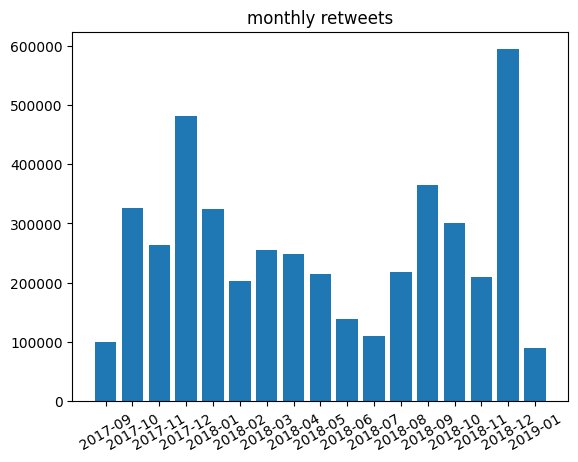

In [13]:
vc = retweet_df['month'].value_counts().sort_index()
months = [str(month)[0:-3] for month in vc.index]
plt.bar(months, vc.values)
plt.title('monthly retweets')
plt.xticks(rotation=30)
plt.show()

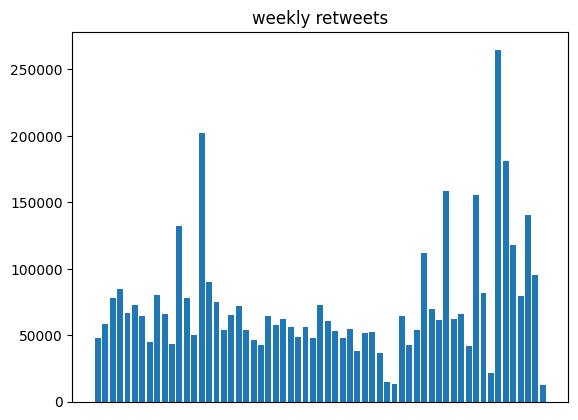

In [14]:
vc = retweet_df['week'].value_counts().sort_index()
weeks = [str(week) for week in vc.index]
plt.bar(weeks, vc.values)
plt.title('weekly retweets')
plt.xticks(ticks=[])
plt.show()

## Getting Leading Users

In [16]:
_, leading_users = dp.get_leading_users(retweet_df, TIMEUNIT, 25, 25)
leading_df = dp.get_only_leading_user_retweets(retweet_df, leading_users, TIMEUNIT, 0)

In [17]:
leading_per_month = len(leading_df[['influencer', TIMEUNIT]].drop_duplicates())
expected_leading_per_month = len(leading_df['influencer'].unique()) * len(leading_df[TIMEUNIT].unique())
print(f"Avg. Percent of Time Periods a Leading User Persists In: {(leading_per_month / expected_leading_per_month):.0%}")

Avg. Percent of Time Periods a Leading User Persists In: 91%


In [ ]:
print(f"{len(leading_df)} ({(len(leading_df) / len(retweet_df)):.0%}) of the retweets are retweeting the leading users (N=25)")
print(f"Leading users represent {(100 / len(retweet_df['influencer'].unique())):.2%} of retweeted individuals total")

641257 (14%) of the retweets are retweeting the leading users (N=50)
Leading users represent 0.06% of retweeted individuals total


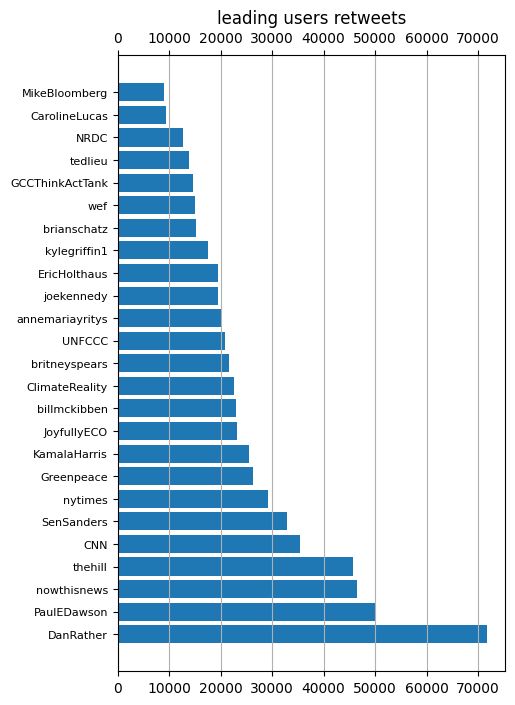

In [19]:
# leading users with smallest audience (this displays retweet count)
vc = leading_df.value_counts('influencer')

plt.figure(figsize=(5,8))
plt.barh(vc.index, vc.values)
plt.title('leading users retweets')
plt.yticks(fontsize=8)
plt.grid(axis='x')
plt.tick_params(top=True, labeltop=True)
plt.show()

## Getting Influencer and Audience Summary Data

In [20]:
leading_summary_df = dp.summarize_tweet_data(leading_df, TIMEUNIT)

print(f"We will be working with {len(leading_df)} retweets from the audience of the {len(leading_df['influencer'].unique())} leading users")
print(f"Time Period for analysis is {leading_df['date'].min()} to {leading_df['date'].max()} in {len(leading_df[TIMEUNIT].unique())} {TIMEUNIT}s")
print(f"There will be {len(leading_summary_df)} rows in the final dataset")

leading_summary_df.head()

We will be working with 641257 retweets from the audience of the 25 leading users
Time Period for analysis is 2017-09-21 to 2019-01-07 in 17 months
There will be 388 rows in the final dataset


,influencer,month,capture,denier,sentiment,male,aggressive,audience_followers,followers,verified,tweet_freq
0,CNN,2017-09-01,0.304192,0.0,-0.159637,0.532137,0.778421,2599.422312,6.060578e+07,0.0,100.720569
1,CarolineLucas,2017-09-01,0.000294,0.0,-0.533246,0.600000,0.000000,4840.400000,6.079236e+05,0.0,10.756467
2,ClimateReality,2017-09-01,0.167332,0.0,-0.145748,0.585263,0.187018,4552.455439,6.302770e+05,0.0,26.273771
3,EricHolthaus,2017-09-01,0.040629,0.0,0.155329,0.589595,0.000000,8709.317919,4.939874e+05,0.0,38.587454
4,GCCThinkActTank,2017-09-01,0.002525,0.0,0.092905,0.255814,0.069767,243580.279070,4.404674e+04,0.0,254.678353


## Getting Audience and Echoer Data

In [21]:
audience_dict = dp.get_audience_dict(leading_df, TIMEUNIT)
echoer_dict = dp.get_echoer_dict(retweet_df, audience_dict, TIMEUNIT)

te.get_tweets(chunk_files, audience_dict).to_pickle('./data/audience.pkl')
te.get_tweets(chunk_files, echoer_dict).to_pickle('./data/echoer.pkl')

In [22]:
audience_df = dp.merge_preprocess_climate_tweets(
    './data/climateTweets.csv',
    './data/audience.pkl',
    start = START,
    end = END,
    retweets=False
)

echoer_df = dp.merge_preprocess_climate_tweets(
    './data/climateTweets.csv',
    './data/echoer.pkl',
    start = START,
    end = END,
    retweets=False
)

In [23]:
final_df = dp.merge_audience_echoer(audience_df, echoer_df, leading_df, retweet_df, TIMEUNIT)

## Verify Match with Kolic

In [24]:
audience = {}
for i in leading_df['influencer'].unique():
    audience[i] = sorted(set(leading_df[leading_df['influencer'] == i]['author_name']))

In [25]:
with open('kolic_audiences.json', 'r') as f:
    kolic_aud = json.loads(f.read())

with open('kolic_echoers.json', 'r') as f:
    kolic_chamb = json.loads(f.read())

### Leading Users

In [26]:
my_set = set(audience.keys())
kolic_set = set(kolic_aud.keys())
print(f"Differences in Leading Users")
print(f"Kolic: {kolic_set.difference(my_set)}")
print(f"Mine: {my_set.difference(kolic_set)}")
print('All of these have a tied persistance of 4')

Differences in Leading Users
Kolic: {'Bill_Nye_Tho', 'ClimateCentral', 'TIME', 'antonioguterres', 'SafetyPinDaily', 'MichaelEMann', 'LeeCamp', 'ajplus', 'CarbonBrief', 'NatGeo', 'FAOKnowledge', 'tveitdal', 'washingtonpost', 'PrisonPlanet', 'citizensclimate', 'NBCNews', 'cathmckenna', 'UNEP', 'EnergyInDepth', 'sciam', 'foe_us', 'guardianeco', 'cnni', 'UN', 'climatecouncil'}
Mine: set()
All of these have a tied persistance of 4


### Audiences

In [27]:
for leader in my_set.intersection(kolic_set):
    assert len(set(audience[leader]).difference(set(kolic_aud[leader]))) == 0
    assert len(set(kolic_aud[leader]).difference(set(audience[leader]))) == 0

print('Passed: Each Leading User Has the same audience aggregated over all time periods')

Passed: Each Leading User Has the same audience aggregated over all time periods


### Chambers

Couldn't get it to match, next section I start from Kolic's audience and chamber and summarize their tweets.

In [28]:
id_to_name = {}
name_to_id = {}

for row in retweet_df[['infl_id', 'influencer']].drop_duplicates().iterrows():
    id_to_name[row[1]['infl_id']] = row[1]['influencer']
    name_to_id[row[1]['influencer']] = row[1]['infl_id']

In [29]:
paul_dict = dp.get_audience_dict(leading_df[leading_df['influencer'] == 'PaulEDawson'], TIMEUNIT)
paul_echoer_dict = dp.get_echoer_dict(retweet_df, paul_dict, 'month')

cnn_dict = dp.get_audience_dict(leading_df[leading_df['influencer'] == 'CNN'], TIMEUNIT)
cnn_echoer_dict = dp.get_echoer_dict(retweet_df, cnn_dict, 'month')

time_dict = dp.get_audience_dict(leading_df[leading_df['influencer'] == 'TIME'], TIMEUNIT)
time_echoer_dict = dp.get_echoer_dict(retweet_df, time_dict, 'month')

bill_dict = dp.get_audience_dict(leading_df[leading_df['influencer'] == 'Bill_Nye_Tho'], TIMEUNIT)
bill_echoer_dict = dp.get_echoer_dict(retweet_df, bill_dict, 'month')

In [30]:
new_dict = {}
for key in paul_echoer_dict.keys():
    new_dict[id_to_name[key]] = paul_echoer_dict[key]
paul_echoer_dict = new_dict

new_dict = {}
for key in cnn_echoer_dict.keys():
    new_dict[id_to_name[key]] = cnn_echoer_dict[key]
cnn_echoer_dict = new_dict

new_dict = {}
for key in time_echoer_dict.keys():
    new_dict[id_to_name[key]] = time_echoer_dict[key]
time_echoer_dict = new_dict

new_dict = {}
for key in bill_echoer_dict.keys():
    new_dict[id_to_name[key]] = bill_echoer_dict[key]
bill_echoer_dict = new_dict

In [31]:
extra = len(set(paul_echoer_dict.keys()).difference(set(kolic_chamb['PaulEDawson'])))
defecit = len(set(kolic_chamb['PaulEDawson']).difference(set(paul_echoer_dict.keys())))
matched = len(set(paul_echoer_dict.keys()).intersection(set(kolic_chamb['PaulEDawson'])))

print(f"There are {extra} extra users in my PaulEDawson chamber")
print(f"There are {defecit} missing users in my PaulEDawson chamber")
print(f"There are {matched} matching users in my PaulEDawson chamber", end='\n\n')

extra = len(set(cnn_echoer_dict.keys()).difference(set(kolic_chamb['CNN'])))
defecit = len(set(kolic_chamb['CNN']).difference(set(cnn_echoer_dict.keys())))
matched = len(set(cnn_echoer_dict.keys()).intersection(set(kolic_chamb['CNN'])))

print(f"There are {extra} extra users in my CNN chamber")
print(f"There are {defecit} missing users in my CNN chamber")
print(f"There are {matched} matching users in my CNN chamber", end='\n\n')

extra = len(set(time_echoer_dict.keys()).difference(set(kolic_chamb['TIME'])))
defecit = len(set(kolic_chamb['TIME']).difference(set(time_echoer_dict.keys())))
matched = len(set(time_echoer_dict.keys()).intersection(set(kolic_chamb['TIME'])))

print(f"There are {extra} extra users in my TIME chamber")
print(f"There are {defecit} missing users in my TIME chamber")
print(f"There are {matched} matching users in my TIME chamber", end='\n\n')

extra = len(set(bill_echoer_dict.keys()).difference(set(kolic_chamb['Bill_Nye_Tho'])))
defecit = len(set(kolic_chamb['Bill_Nye_Tho']).difference(set(bill_echoer_dict.keys())))
matched = len(set(bill_echoer_dict.keys()).intersection(set(kolic_chamb['Bill_Nye_Tho'])))

print(f"There are {extra} extra users in my TIME chamber")
print(f"There are {defecit} missing users in my TIME chamber")
print(f"There are {matched} matching users in my TIME chamber", end='\n\n')


There are 310 extra users in my PaulEDawson chamber
There are 5 missing users in my PaulEDawson chamber
There are 29366 matching users in my PaulEDawson chamber

There are 398 extra users in my CNN chamber
There are 0 missing users in my CNN chamber
There are 8836 matching users in my CNN chamber

There are 0 extra users in my TIME chamber
There are 2991 missing users in my TIME chamber
There are 0 matching users in my TIME chamber

There are 0 extra users in my TIME chamber
There are 342 missing users in my TIME chamber
There are 0 matching users in my TIME chamber



My chamber seems to be, for the most part, a superset of Kolic's chambers. Therefore, I filter out echoer_dict to match Kolic's chambers more closely.

In [32]:
kolic_echoers = np.concatenate(list(kolic_chamb.values()))

In [33]:
new_echoer_dict = {}

for key in echoer_dict.keys():
    if id_to_name[key] in kolic_echoers: new_echoer_dict[key] = echoer_dict[key]

In [34]:
te.get_tweets(chunk_files, new_echoer_dict).to_pickle('./data/new_echoer.pkl')

In [35]:
new_echoer_df = dp.merge_preprocess_climate_tweets(
    './data/climateTweets.csv',
    './data/new_echoer.pkl',
    start = START,
    end = END,
    retweets=False
)

In [36]:
final_df = dp.merge_audience_echoer(audience_df, new_echoer_df, leading_df, retweet_df, TIMEUNIT)

In [37]:
final_df

,influencer,month,capture_audience,denier_audience,sentiment_audience,male_audience,aggressive_audience,followers_audience,verified_audience,freq_audience,capture_echoer,denier_echoer,sentiment_echoer,male_echoer,aggressive_echoer,followers_echoer,verified_echoer,freq_echoer
0,CNN,2017-09-01,0.000311,0.081710,-0.098692,0.590604,0.421624,8715.676624,0.0,35.028237,0.000527,0.006478,-0.049295,0.794321,0.631725,3.867654e+07,0.0,51.090283
1,CarolineLucas,2017-09-01,0.001175,0.071429,0.246380,0.500000,0.071429,8255.785714,0.0,45.665955,0.000303,0.025463,0.219833,0.625000,0.254630,2.596688e+04,0.0,3.940489
2,ClimateReality,2017-09-01,0.000485,0.046034,-0.000232,0.664093,0.384247,8546.847849,0.0,26.726841,0.001878,0.007418,0.071891,0.873902,0.266671,1.737661e+06,0.0,17.395290
3,EricHolthaus,2017-09-01,0.000317,0.014848,0.013698,0.702381,0.351617,13578.761185,0.0,38.494177,0.000457,0.005744,-0.089890,0.879949,0.444904,9.822435e+05,0.0,19.080808
4,GCCThinkActTank,2017-09-01,0.084195,0.000000,-0.039097,0.000000,0.034916,186013.484171,0.0,161.499040,0.001665,0.004202,0.100709,0.928571,0.286574,1.194403e+06,0.0,39.030292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,kylegriffin1,2019-01-01,0.000461,0.000000,0.011985,0.750000,0.375000,3139.625000,0.0,16.302667,0.000392,0.000000,0.000600,0.791667,0.871212,2.556917e+06,0.0,27.211194
369,nowthisnews,2019-01-01,0.000723,0.074618,-0.043586,0.714286,0.447406,7643.865384,0.0,35.098472,0.001239,0.003565,-0.087045,0.741526,0.584362,3.149936e+06,0.0,48.803409
370,nytimes,2019-01-01,0.001107,0.000000,-0.250780,1.000000,0.333333,2746.333333,0.0,31.678216,0.000539,0.000000,0.109559,0.833333,0.408333,6.795104e+04,0.0,14.111190
371,thehill,2019-01-01,0.001538,0.063492,-0.162775,0.666667,0.512235,13843.594522,0.0,49.806520,0.000844,0.002781,-0.050124,0.851491,0.407704,4.931715e+06,0.0,108.967126


In [38]:
final_df.to_pickle('final.pkl')

Hypotheses:

1. echoer_dict has more unique echoers because of the different leading users (nope, same leading user has more)
2. echoer_df has less unique echoers because it filters out all the echoers who don't have original tweets in the dataset

## EDA

In [43]:
final_df = pd.read_pickle('final.pkl')

In [53]:
final_df.columns

Index(['influencer', 'month', 'capture_audience', 'denier_audience',
       'sentiment_audience', 'male_audience', 'aggressive_audience',
       'followers_audience', 'verified_audience', 'freq_audience',
       'capture_echoer', 'denier_echoer', 'sentiment_echoer', 'male_echoer',
       'aggressive_echoer', 'followers_echoer', 'verified_echoer',
       'freq_echoer'],
      dtype='object')

In [49]:
px.line(
    final_df,
    x='month', 
    y='denier_audience', 
    color='influencer',
    title='monthly proportion of tweets by audience that were climate denying'
)

In [52]:
px.line(
    final_df,
    x='month', 
    y='denier_echoer', 
    color='influencer',
    title='monthly proportion of tweets by echoers that were climate denying'
)

In [55]:
px.line(
    final_df,
    x='month', 
    y='sentiment_audience', 
    color='influencer',
    title='monthly audience sentiment'
)

In [57]:
px.line(
    final_df,
    x='month', 
    y='sentiment_echoer', 
    color='influencer',
    title='monthly echoer sentiment'
)